In [298]:
import pandas as pd

df = pd.read_csv("../data/cleaned_data/cleaned_data_2.csv")

in this notebook we want to ask weather we can use logistic regression to predict the type of comorbidity symptoms, some of the individuals do not meet the threshold of 21 on the ocir to be considered as OCD patient, this is why we cannot say they all have present OCD, though all of them said they do.

In [299]:
df

,Unnamed: 0,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,...,depression_diagnosis_type,anxiety_diagnosis_type,CATS_Total,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total
0,0,2,1,23.0,4,1,1,1,4.0,4.0,...,No Depression,Possible anxiety,27.0,0.0,8.0,6.0,4.0,3.0,5.0,31.0
1,1,3,1,22.0,4,1,1,1,4.0,4.0,...,No Depression,Probable Clinical anxiety,49.0,1.0,2.0,5.0,1.0,1.0,5.0,45.0
2,2,4,1,21.0,4,1,1,1,2.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,64.0,0.0,3.0,2.0,0.0,6.0,9.0,83.0
3,3,5,1,18.0,4,1,1,1,2.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,77.0,2.0,9.0,4.0,11.0,12.0,7.0,77.0
4,4,6,1,19.0,4,2,1,1,1.0,1.0,...,Probable Clinical Depression,Probable Clinical anxiety,27.0,4.0,1.0,3.0,0.0,12.0,2.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,368,1,25.0,2,1,2,4,3.0,4.0,...,No Depression,Probable Clinical anxiety,95.0,9.0,11.0,6.0,6.0,5.0,6.0,77.0
145,145,382,1,33.0,3,1,2,4,4.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,64.0,0.0,7.0,9.0,4.0,0.0,8.0,53.0
146,146,384,1,27.0,1,1,2,4,2.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,61.0,9.0,5.0,5.0,2.0,1.0,9.0,58.0
147,147,387,2,42.0,4,1,2,4,3.0,2.0,...,No Depression,No anxiety,33.0,6.0,6.0,9.0,7.0,5.0,4.0,54.0


In [300]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   P_Num                                             149 non-null    int64  
 1   Gender                                            149 non-null    int64  
 2   Age                                               149 non-null    float64
 3   Ethnicity                                         149 non-null    int64  
 4   Education                                         149 non-null    int64  
 5   OCD_selfReport                                    149 non-null    int64  
 6   TreatmentPresence                                 149 non-null    int64  
 7   AC_1                                              149 non-null    float64
 8   AC_2                                              149 non-null    float64
 9   AC_3                 

a function to categorize individuals according to their score on the HADS-anxiety and HADS-depression scales, using a cutoff of 8

In [302]:
def comorbidity_type_summarized(row):
    if (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety and depression present"
    elif (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] <= 7):
        return "anxiety present depression absent"
    elif (row["HADS_ANX_Scale_Total"] <= 7) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety absent depression present"
    else:
        return "anxiety and depression absent"


df["comorbidity_type_summarized"] = df.apply(comorbidity_type_summarized, axis=1)

In [303]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,AC_3,...,anxiety_diagnosis_type,CATS_Total,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type_summarized
0,2,1,23.0,4,1,1,1,4.0,4.0,3.0,...,Possible anxiety,27.0,0.0,8.0,6.0,4.0,3.0,5.0,31.0,anxiety present depression absent
1,3,1,22.0,4,1,1,1,4.0,4.0,2.0,...,Probable Clinical anxiety,49.0,1.0,2.0,5.0,1.0,1.0,5.0,45.0,anxiety present depression absent
2,4,1,21.0,4,1,1,1,2.0,3.0,2.0,...,Probable Clinical anxiety,64.0,0.0,3.0,2.0,0.0,6.0,9.0,83.0,anxiety and depression present
3,5,1,18.0,4,1,1,1,2.0,3.0,3.0,...,Probable Clinical anxiety,77.0,2.0,9.0,4.0,11.0,12.0,7.0,77.0,anxiety and depression present
4,6,1,19.0,4,2,1,1,1.0,1.0,4.0,...,Probable Clinical anxiety,27.0,4.0,1.0,3.0,0.0,12.0,2.0,87.0,anxiety and depression present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,3.0,4.0,3.0,...,Probable Clinical anxiety,95.0,9.0,11.0,6.0,6.0,5.0,6.0,77.0,anxiety present depression absent
145,382,1,33.0,3,1,2,4,4.0,3.0,3.0,...,Probable Clinical anxiety,64.0,0.0,7.0,9.0,4.0,0.0,8.0,53.0,anxiety and depression present
146,384,1,27.0,1,1,2,4,2.0,3.0,3.0,...,Probable Clinical anxiety,61.0,9.0,5.0,5.0,2.0,1.0,9.0,58.0,anxiety and depression present
147,387,2,42.0,4,1,2,4,3.0,2.0,2.0,...,No anxiety,33.0,6.0,6.0,9.0,7.0,5.0,4.0,54.0,anxiety and depression absent


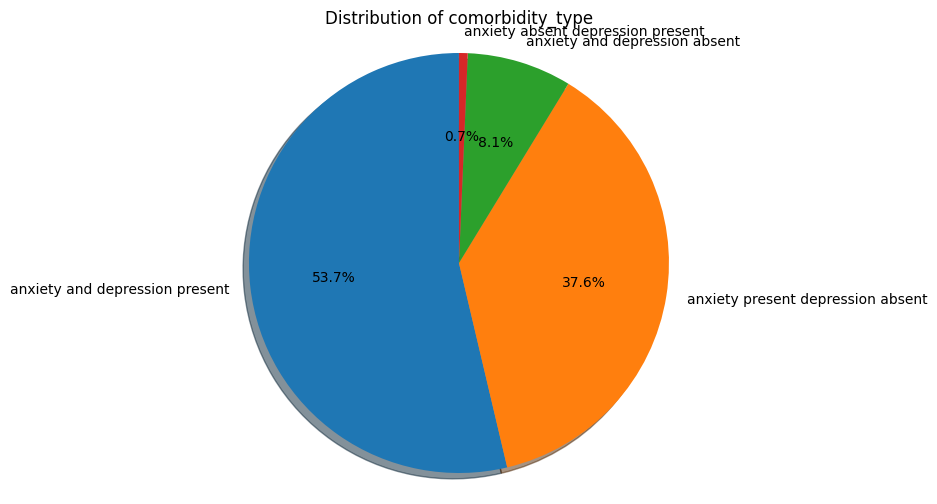

In [304]:
import matplotlib.pyplot as plt

sizes = df["comorbidity_type_summarized"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

for this study we are only focused on these two categories:
1. anxiety symptoms only
2. anxiety and depression symptoms

In [305]:
df = df[
    (df["comorbidity_type_summarized"] != "anxiety absent depression present")
    & (df["comorbidity_type_summarized"] != "anxiety and depression absent")
].copy()

In [306]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,AC_3,...,anxiety_diagnosis_type,CATS_Total,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type_summarized
0,2,1,23.0,4,1,1,1,4.0,4.0,3.0,...,Possible anxiety,27.0,0.0,8.0,6.0,4.0,3.0,5.0,31.0,anxiety present depression absent
1,3,1,22.0,4,1,1,1,4.0,4.0,2.0,...,Probable Clinical anxiety,49.0,1.0,2.0,5.0,1.0,1.0,5.0,45.0,anxiety present depression absent
2,4,1,21.0,4,1,1,1,2.0,3.0,2.0,...,Probable Clinical anxiety,64.0,0.0,3.0,2.0,0.0,6.0,9.0,83.0,anxiety and depression present
3,5,1,18.0,4,1,1,1,2.0,3.0,3.0,...,Probable Clinical anxiety,77.0,2.0,9.0,4.0,11.0,12.0,7.0,77.0,anxiety and depression present
4,6,1,19.0,4,2,1,1,1.0,1.0,4.0,...,Probable Clinical anxiety,27.0,4.0,1.0,3.0,0.0,12.0,2.0,87.0,anxiety and depression present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,366,1,27.0,2,1,2,2,4.0,4.0,4.0,...,Probable Clinical anxiety,96.0,11.0,10.0,9.0,6.0,7.0,10.0,81.0,anxiety and depression present
144,368,1,25.0,2,1,2,4,3.0,4.0,3.0,...,Probable Clinical anxiety,95.0,9.0,11.0,6.0,6.0,5.0,6.0,77.0,anxiety present depression absent
145,382,1,33.0,3,1,2,4,4.0,3.0,3.0,...,Probable Clinical anxiety,64.0,0.0,7.0,9.0,4.0,0.0,8.0,53.0,anxiety and depression present
146,384,1,27.0,1,1,2,4,2.0,3.0,3.0,...,Probable Clinical anxiety,61.0,9.0,5.0,5.0,2.0,1.0,9.0,58.0,anxiety and depression present


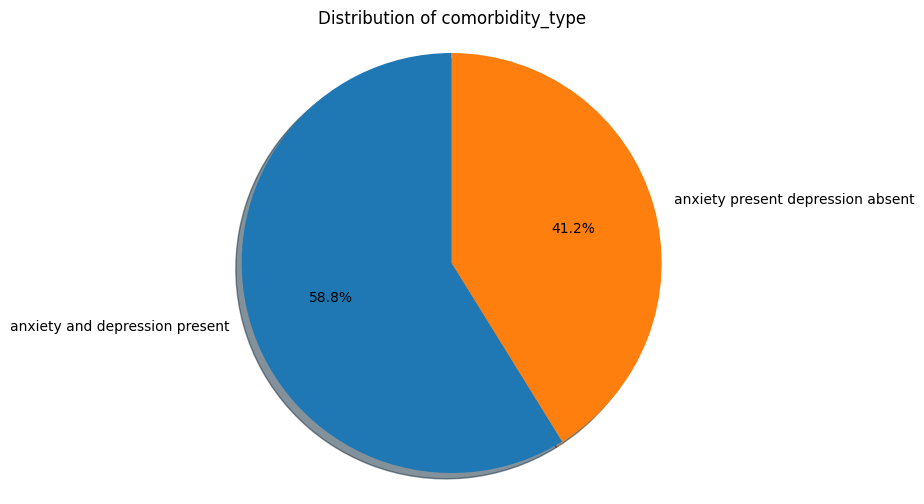

In [307]:
import matplotlib.pyplot as plt

sizes = df["comorbidity_type_summarized"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

In [308]:
features_plt = [
    "CATS_Total",
    "OCIR_Total",
    "OCIR_Hoarding_Total",
    "OCIR_Checking_Total",
    "OCIR_Ordering_Total",
    "OCIR_Neutralizing_Total",
    "OCIR_Washing_Total",
    "OCIR_Obsessing_Total",
    "Brief_Experiential_Avoidance_Questionnaire_Total",
]
label_plt = ["comorbidity_type_summarized"]

In [309]:
df["Education"].value_counts()

Education
1    114
2     22
Name: count, dtype: int64

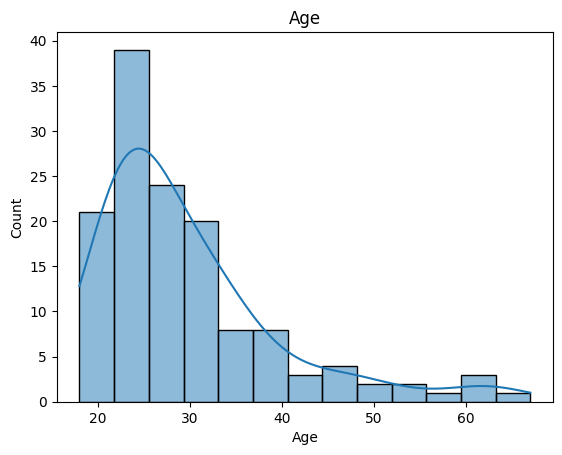

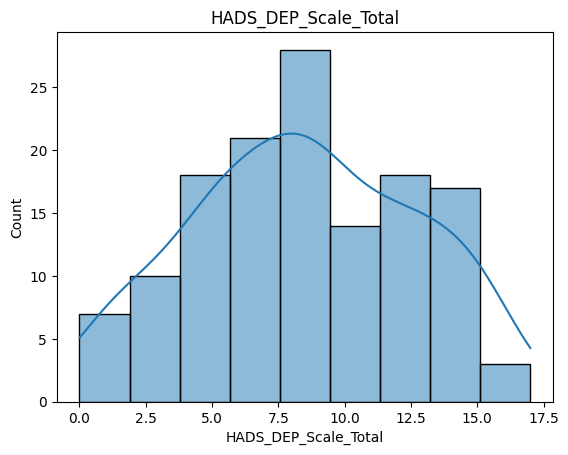

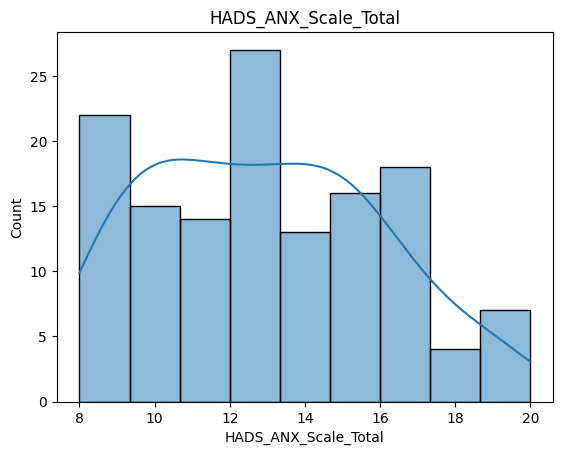

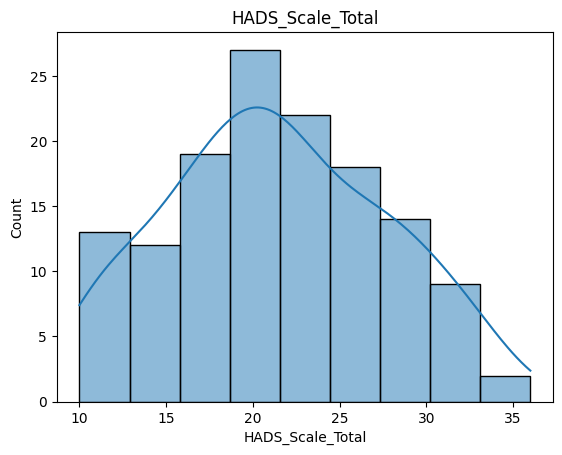

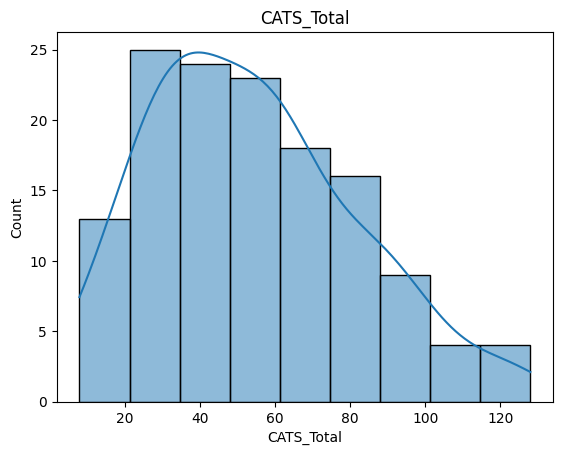

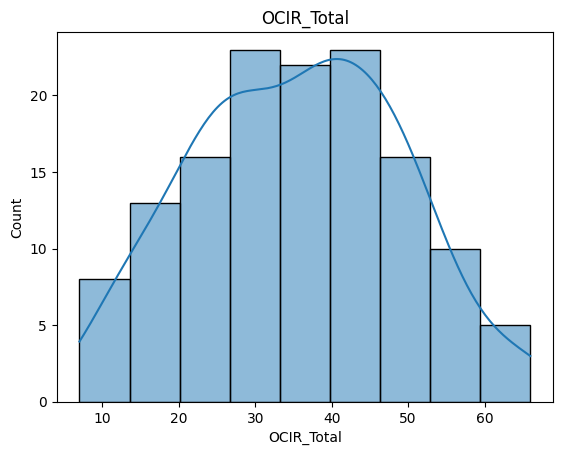

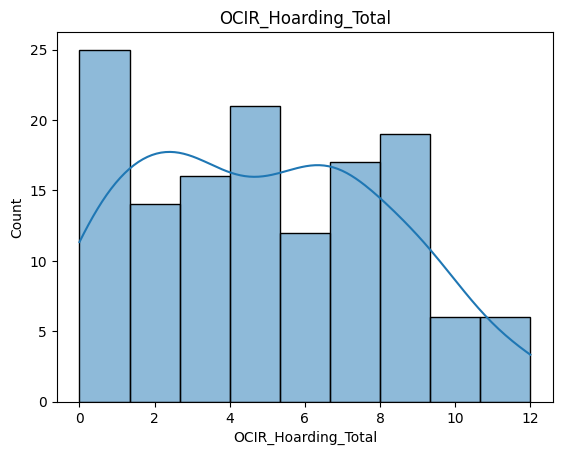

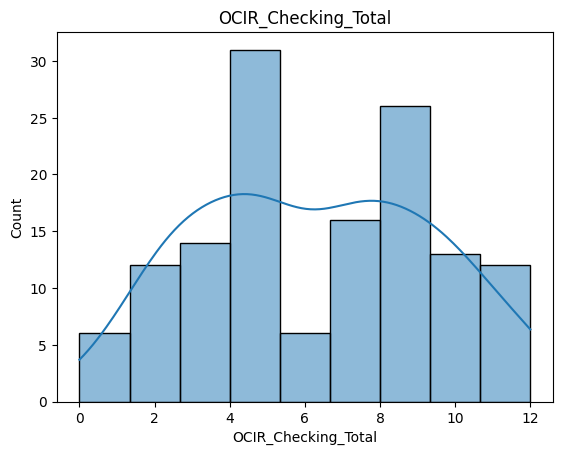

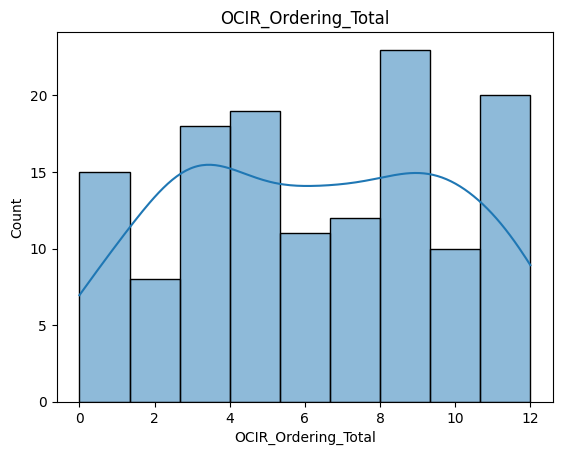

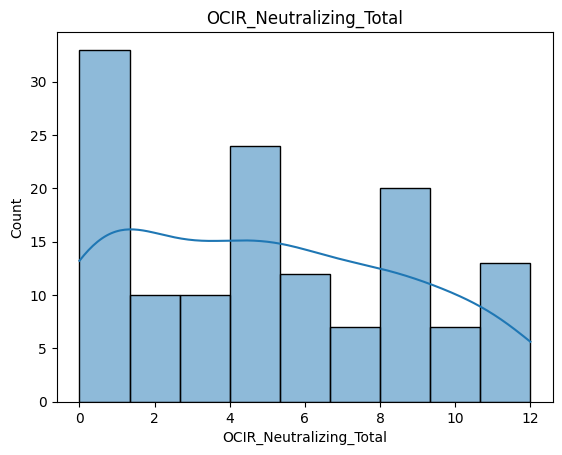

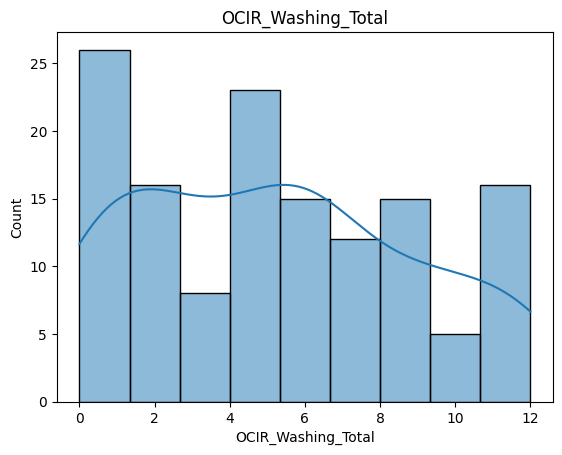

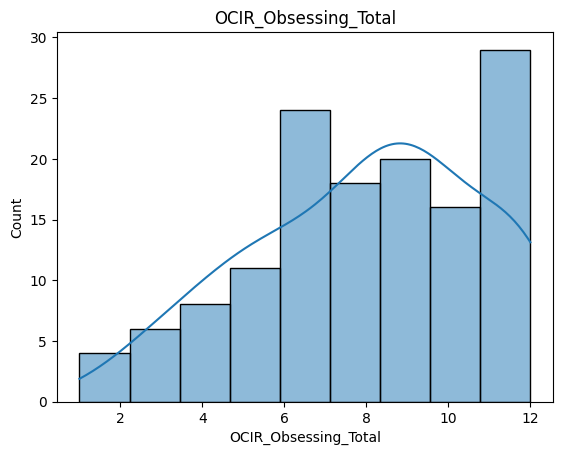

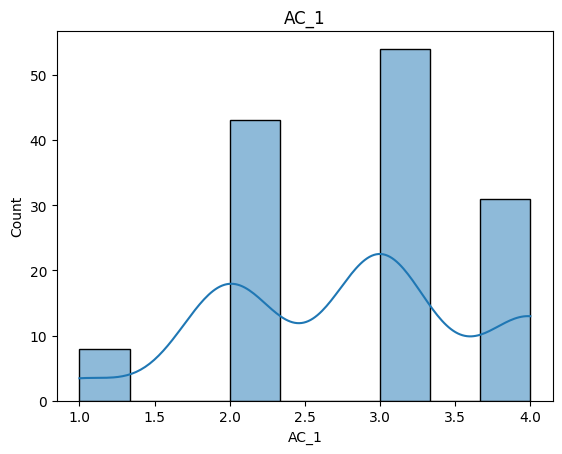

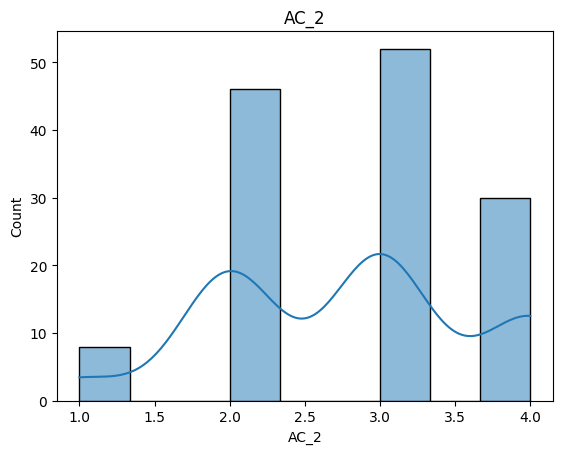

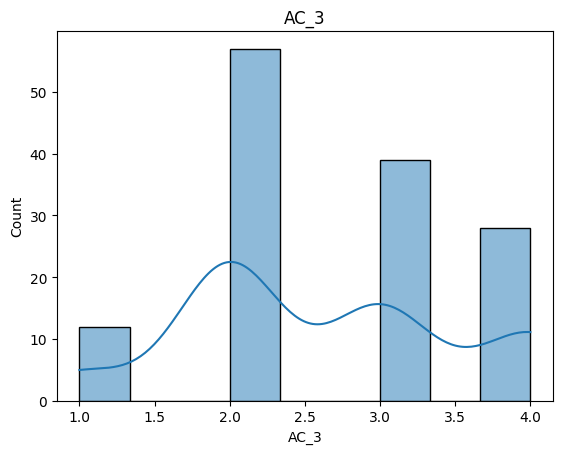

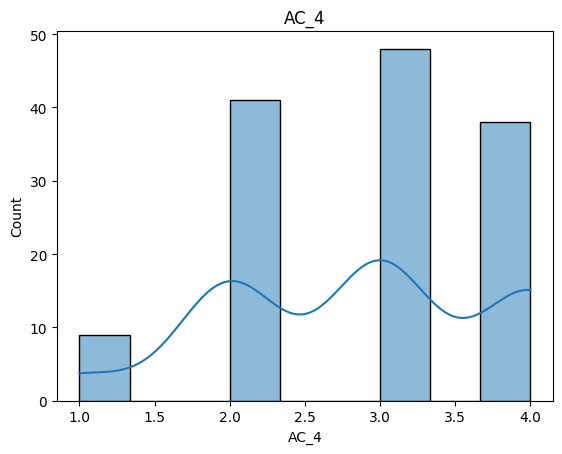

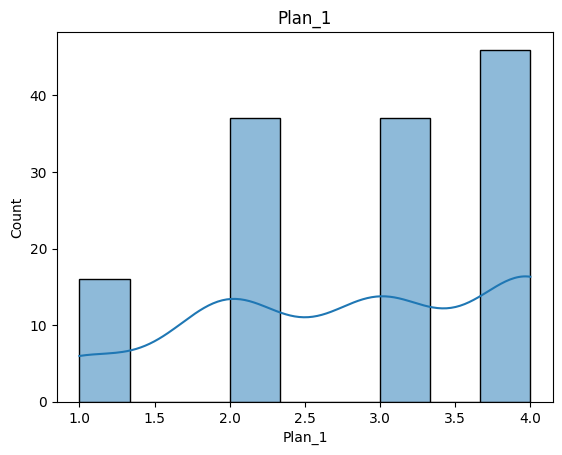

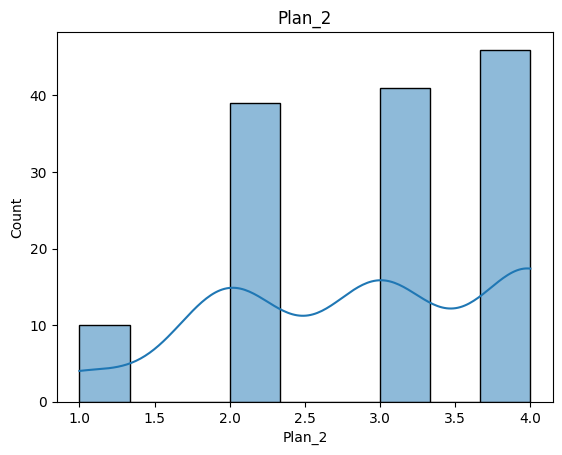

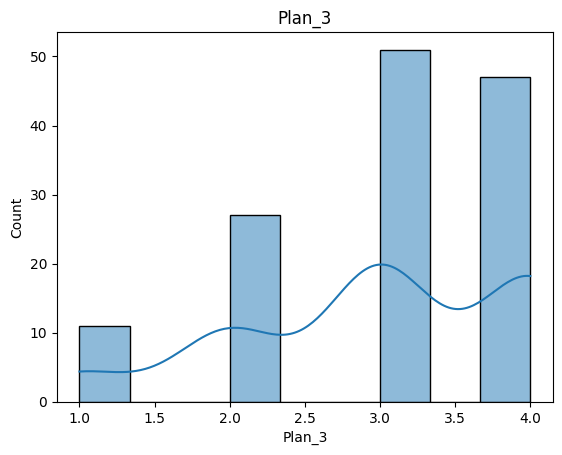

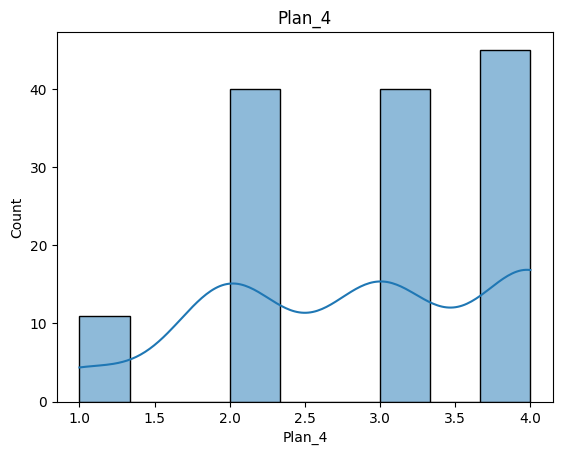

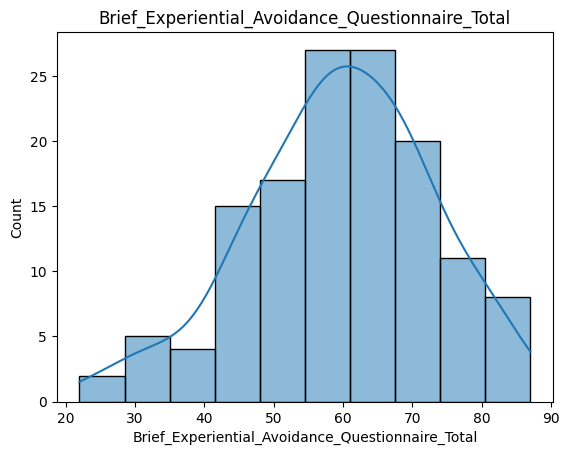

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "Age",
    "HADS_DEP_Scale_Total",
    "HADS_ANX_Scale_Total",
    "HADS_Scale_Total",
    "CATS_Total",
    "OCIR_Total",
    "OCIR_Hoarding_Total",
    "OCIR_Checking_Total",
    "OCIR_Ordering_Total",
    "OCIR_Neutralizing_Total",
    "OCIR_Washing_Total",
    "OCIR_Obsessing_Total",
    "AC_1",
    "AC_2",
    "AC_3",
    "AC_4",
    "Plan_1",
    "Plan_2",
    "Plan_3",
    "Plan_4",
    "Brief_Experiential_Avoidance_Questionnaire_Total",
]

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

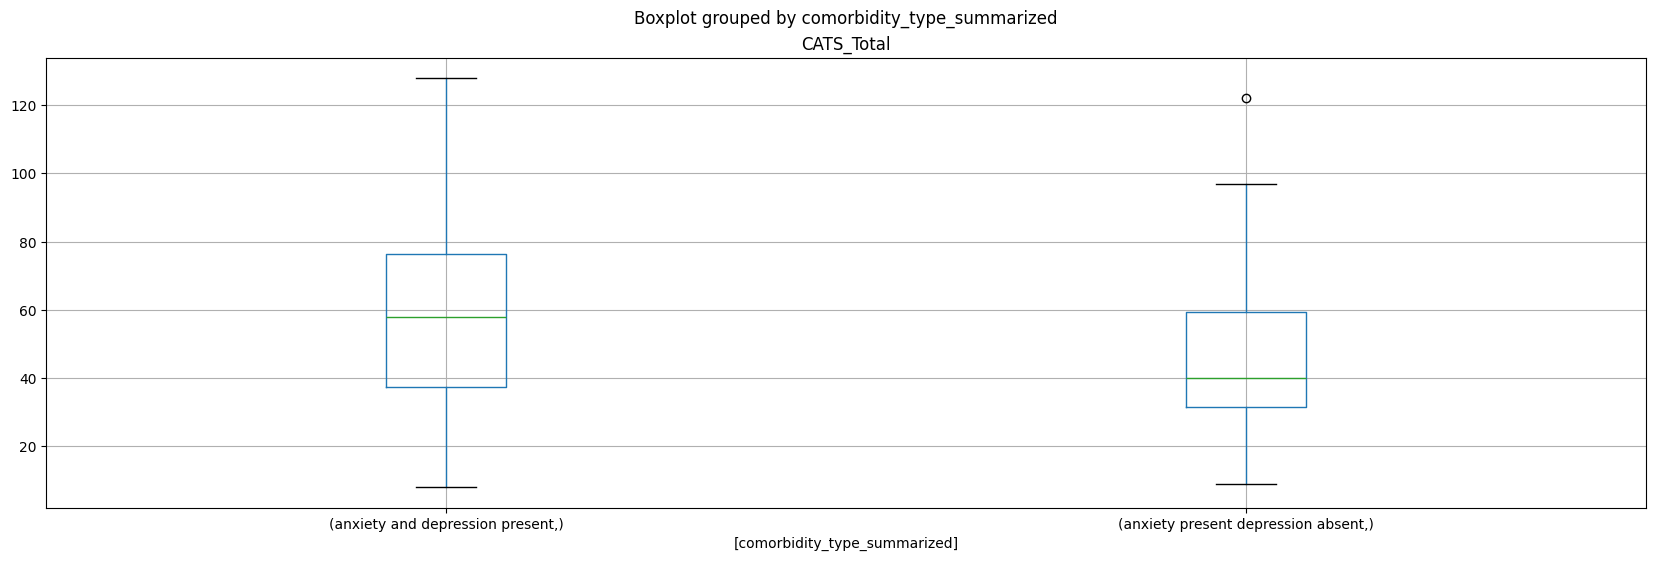

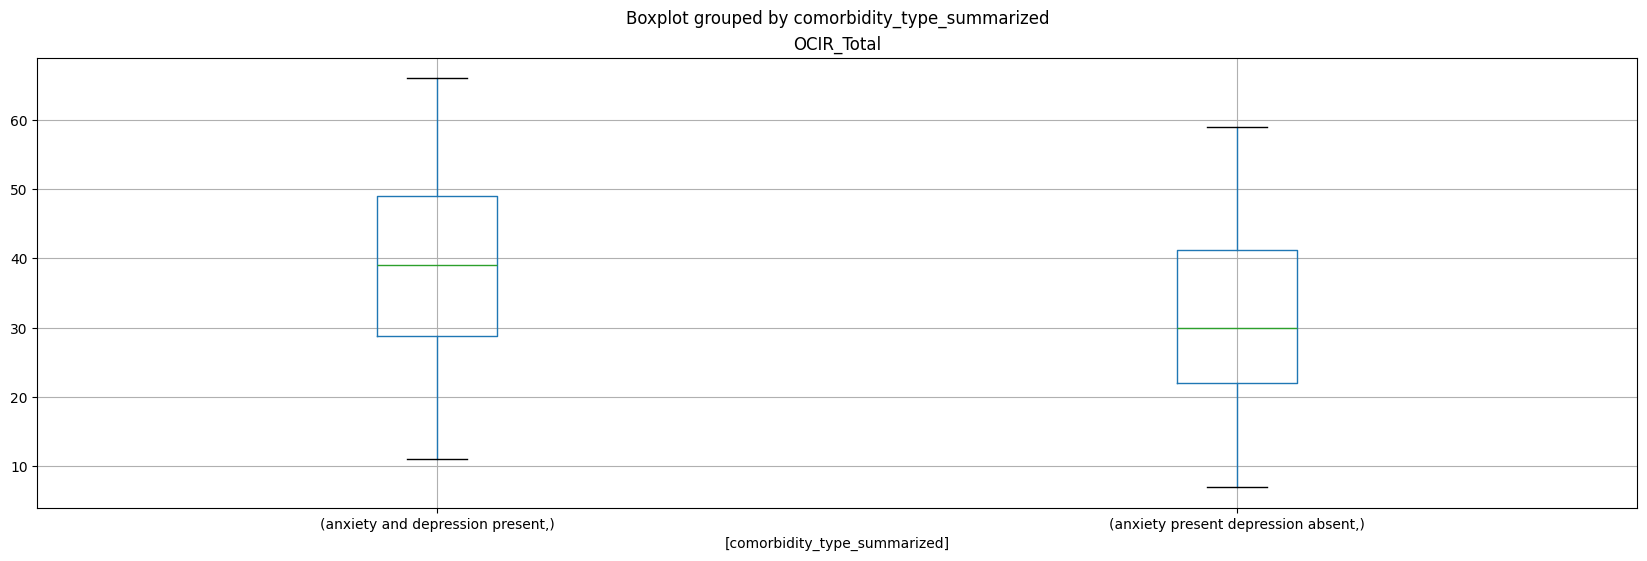

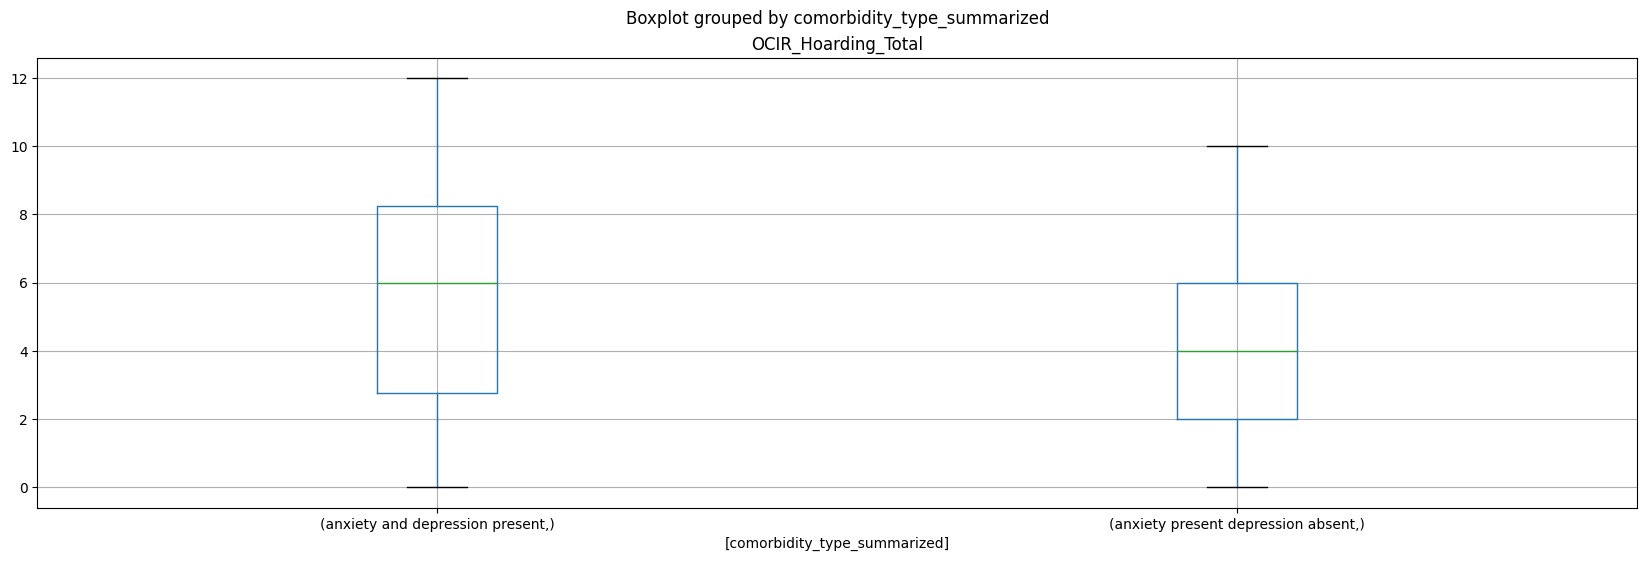

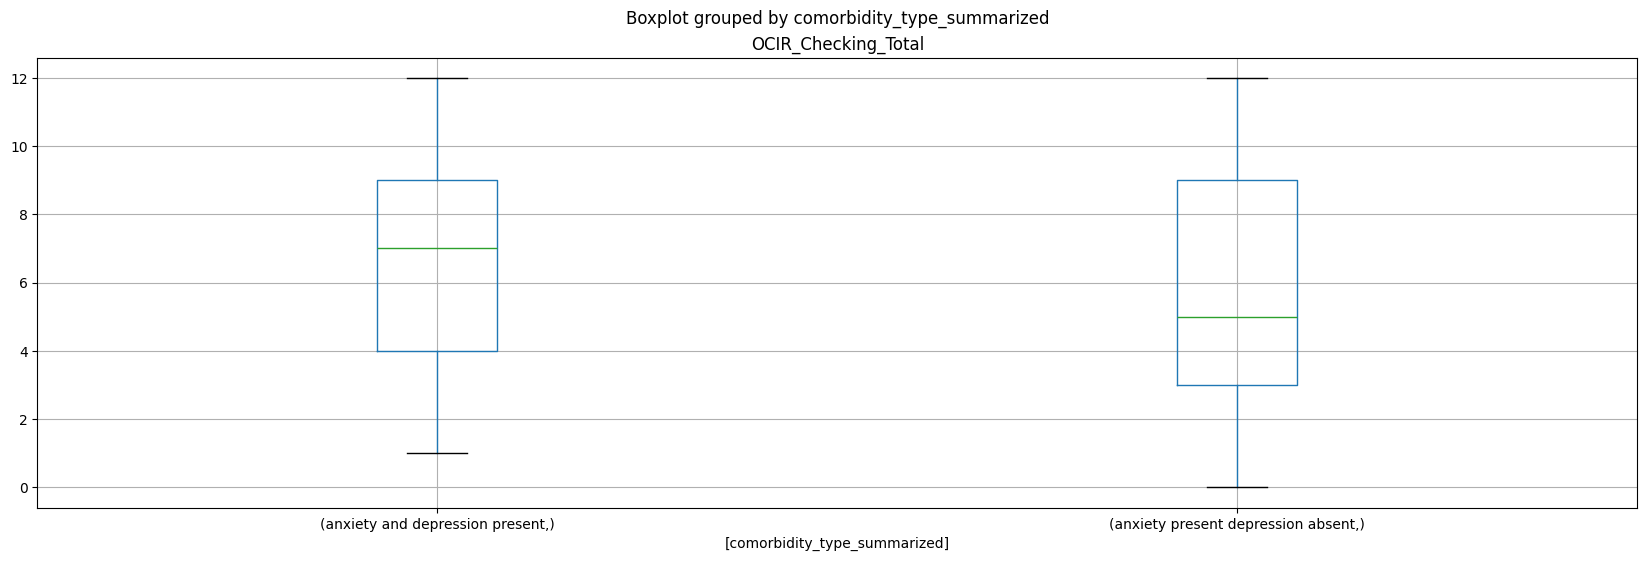

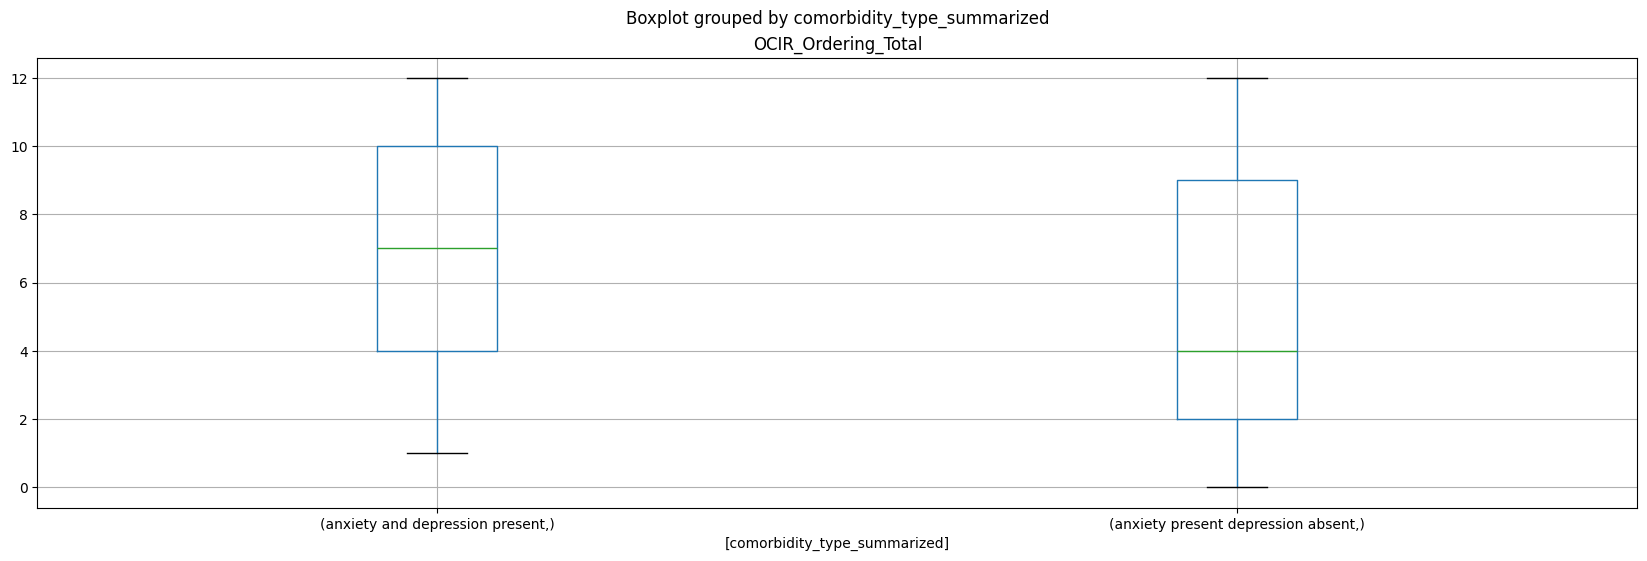

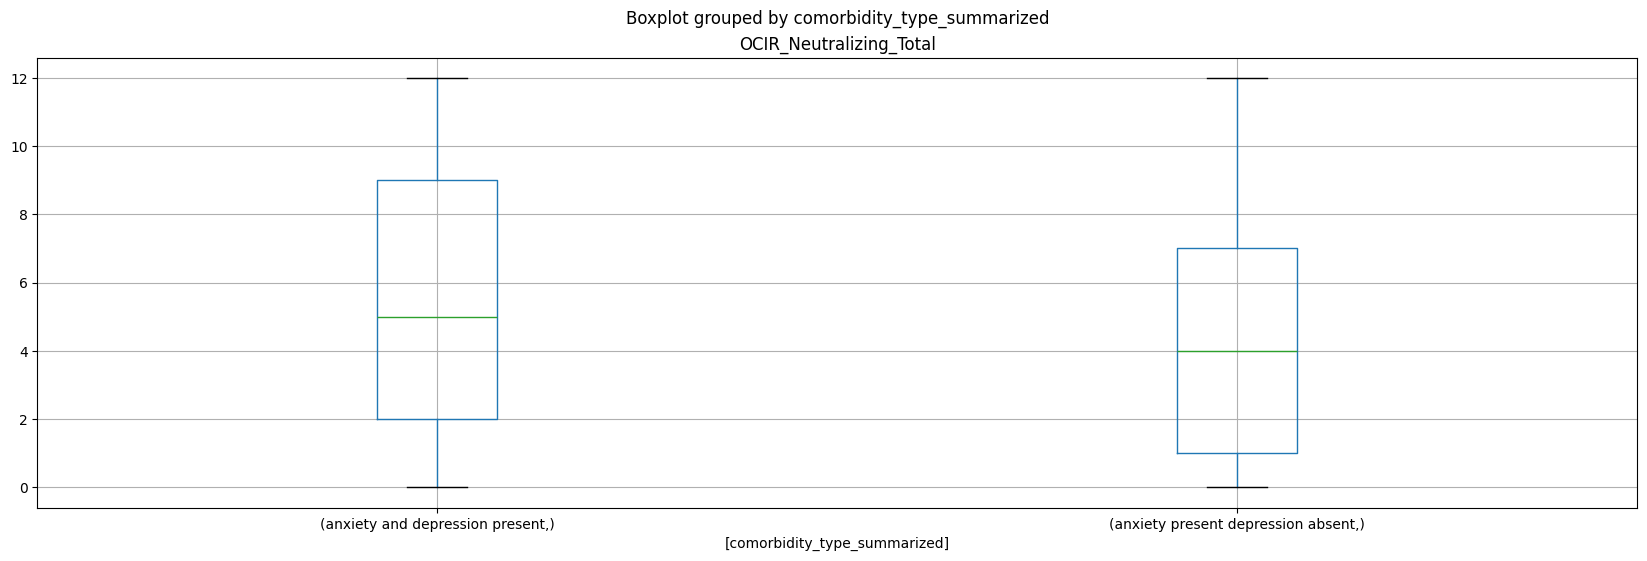

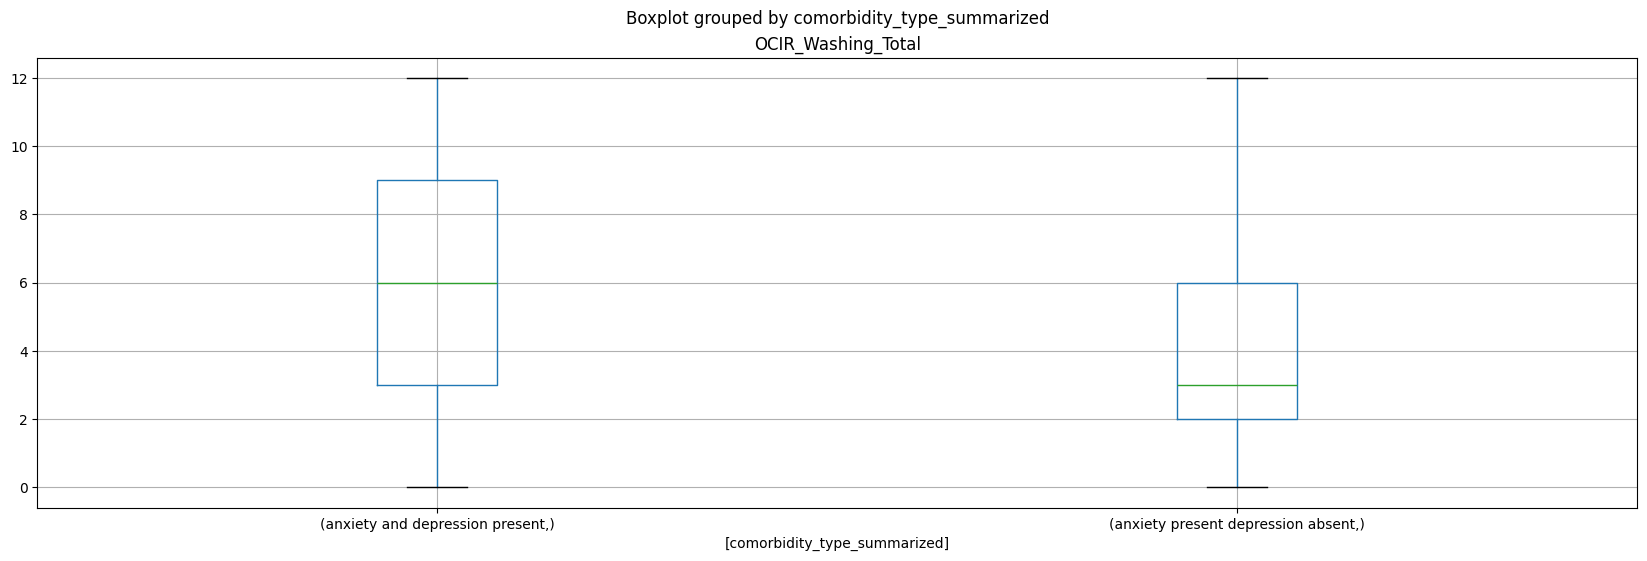

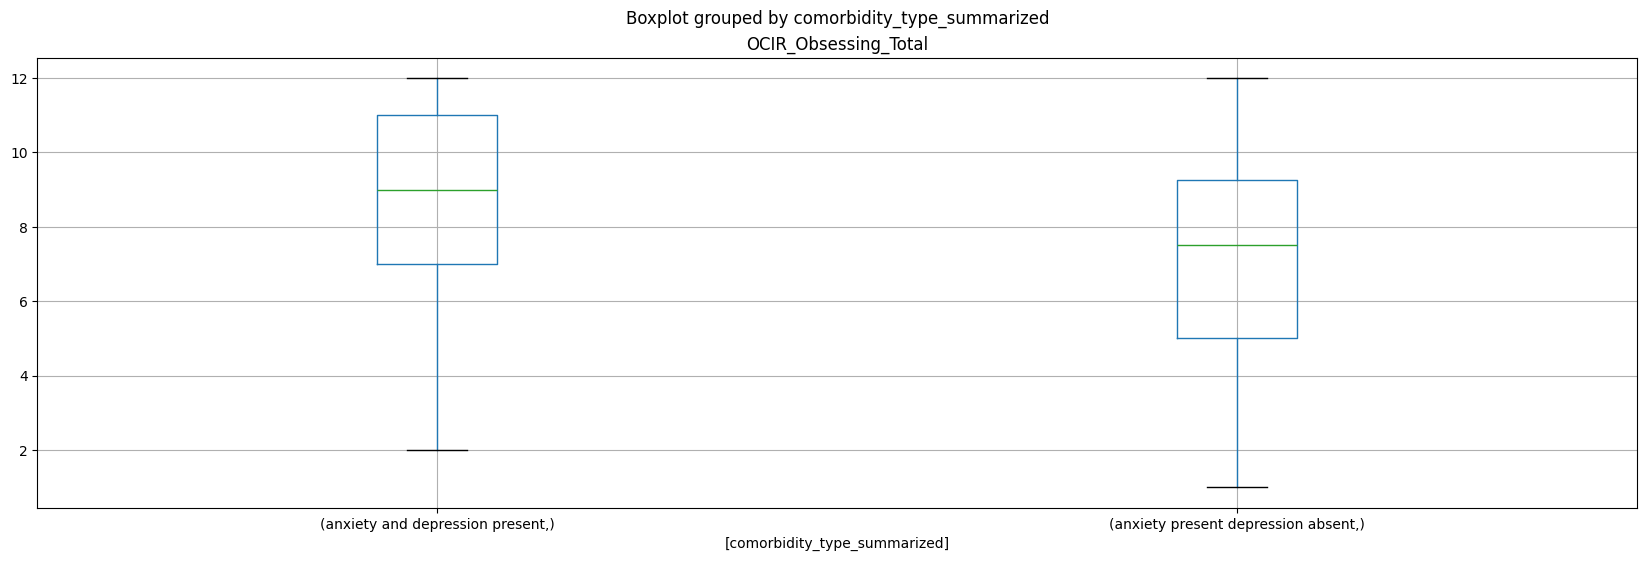

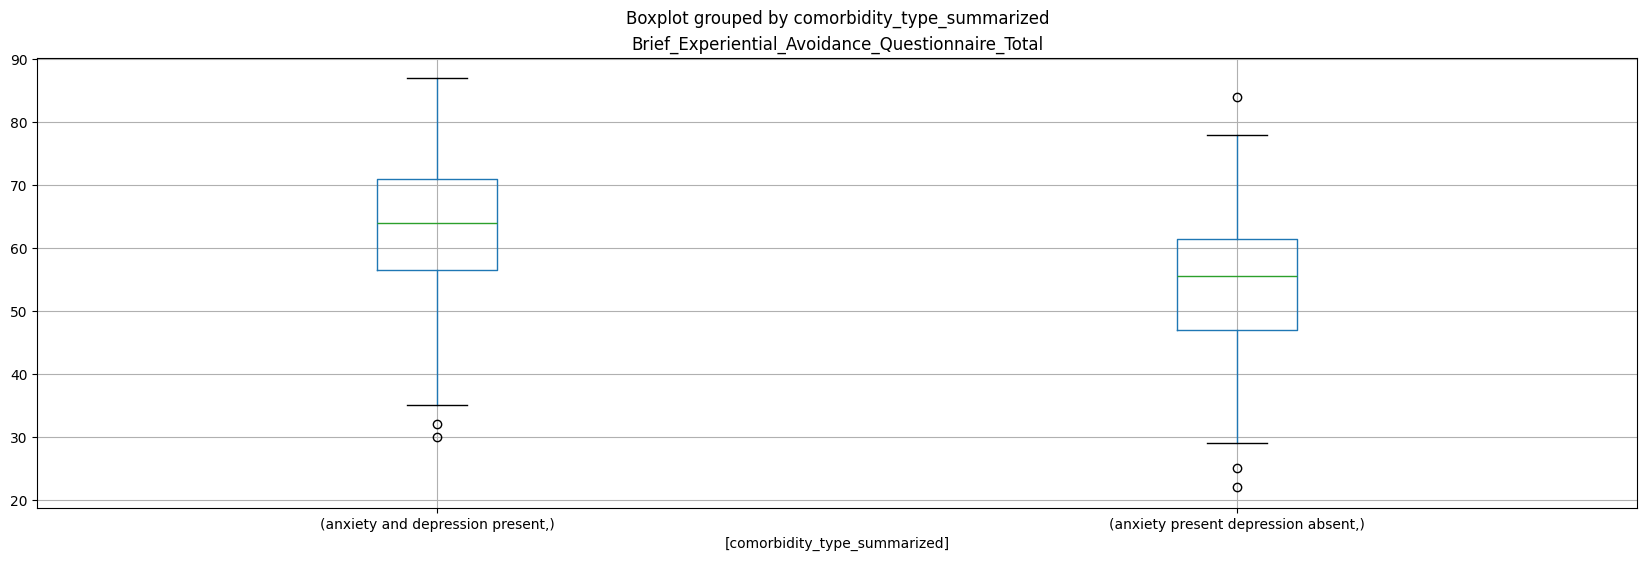

In [311]:
from matplotlib import pyplot as plt

%matplotlib inline

for col in features_plt:
    df.boxplot(column=col, by=label_plt, figsize=(20, 6))
    plt.title(col)
plt.show()

In [312]:
df["comorbidity_type_summarized"].value_counts()

comorbidity_type_summarized
anxiety and depression present       80
anxiety present depression absent    56
Name: count, dtype: int64


* The age column was highly skewed  with a bunch of outliers.
* CATS showed some difference in distribution.
* ocir_hoarding column showed some difference in distribution 
* ocir_total also showed some differences between different categories along with other ocir sub-scales
* EA: also showed a difference in distribution and some outliers.

In [313]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# #cat_feature_columns = [2,4,6,7,8,9,10,11]
# #num_feature_columns=[19,20,21,22,23,24,25,26,27,28,30]
# categorical_features=['Education','TreatmentPresence']
# numeric_features=['CATS_Total','OCIR_Total','OCIR_Hoarding_Total','OCIR_Checking_Total','OCIR_Ordering_Total','OCIR_Neutralizing_Total','OCIR_Washing_Total','OCIR_Obsessing_Total','Brief_Experiential_Avoidance_Questionnaire_Total']
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('encoder', OneHotEncoder(drop='first'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# model_1 = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LogisticRegression())
# ])

In [314]:
from sklearn.preprocessing import LabelEncoder

In [315]:
df["comorbidity_type_summarized"].value_counts()

comorbidity_type_summarized
anxiety and depression present       80
anxiety present depression absent    56
Name: count, dtype: int64

model_2, we wil do the same thing, but only using the scales as features, dropping categorical columns and the age column

In [316]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# cat_feature_columns = [2,4,6,7,8,9,10,11]
# num_feature_columns=[19,20,21,22,23,24,25,26,27,28,30]

numeric_features = [
    "CATS_Total",
    "OCIR_Total",
    "OCIR_Hoarding_Total",
    "OCIR_Checking_Total",
    "OCIR_Ordering_Total",
    "OCIR_Neutralizing_Total",
    "OCIR_Washing_Total",
    "OCIR_Obsessing_Total",
    "Brief_Experiential_Avoidance_Questionnaire_Total",
]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])


# categorical_transformer = Pipeline(steps=[
# ('encoder', OneHotEncoder(drop='first'))
# ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        # ('cat', categorical_transformer, categorical_features)
    ]
)

model_2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LogisticRegression())]
)

In [317]:
features_2 = df[
    [
        "CATS_Total",
        "OCIR_Total",
        "OCIR_Hoarding_Total",
        "OCIR_Checking_Total",
        "OCIR_Ordering_Total",
        "OCIR_Neutralizing_Total",
        "OCIR_Washing_Total",
        "OCIR_Obsessing_Total",
        "Brief_Experiential_Avoidance_Questionnaire_Total",
    ]
]
label_2 = df["comorbidity_type_summarized"]

In [318]:
le_2 = LabelEncoder()
y_encoded_2 = le_2.fit_transform(label_2)

we will first try with cross validation (5 folds)

In [319]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_2, features_2, y_encoded_2, cv=5)

In [320]:
print(scores)
print("Mean CV score:", scores.mean())

[0.78571429 0.74074074 0.66666667 0.48148148 0.59259259]
Mean CV score: 0.6534391534391534


In [321]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model_2, features_2, y_encoded_2, cv=5, return_train_score=True)

print("Train:", scores["train_score"])
print("Val:", scores["test_score"])

Train: [0.68518519 0.65137615 0.65137615 0.72477064 0.71559633]
Val: [0.78571429 0.74074074 0.66666667 0.48148148 0.59259259]


there is a considerable difference between the train and validation score in some folds, since we only have two classes 3 folds might be better

In [322]:
scores = cross_val_score(model_2, features_2, y_encoded_2, cv=3)

In [323]:
print(scores)
print("Mean CV score:", scores.mean())

[0.76086957 0.6        0.57777778]
Mean CV score: 0.6462157809983896


In [324]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model_2, features_2, y_encoded_2, cv=3, return_train_score=True)

print("Train:", scores["train_score"])
print("Val:", scores["test_score"])

Train: [0.67777778 0.62637363 0.75824176]
Val: [0.76086957 0.6        0.57777778]


overall accuracy is slightly less and there is still a considerable difference between the validation and and the train scores especially in fold 3 

we are going to train a model using 3-folds cross validation, using features:'CATS_Total','OCIR_Total',
'OCIR_Hoarding_Total','OCIR_Checking_Total','OCIR_Ordering_Total','OCIR_Neutralizing_Total','OCIR_Washing_Total','OCIR_Obsessing_Total','Brief_Experiential_Avoidance_Questionnaire_Total', to predict these two classes: anxiety symptoms only, anxiety and depression symptoms


In [325]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

now we are still using 3-folds cross validation, but with StratifiedKFold, which preserves the class distribution in each fold

In [326]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    model_2, features_2, y_encoded_2, cv=cv, return_train_score=True
)

print("Train:", scores["train_score"])
print("Val:", scores["test_score"])

Train: [0.66666667 0.76923077 0.65934066]
Val: [0.67391304 0.6        0.68888889]


there is no huge difference between the train and validation scores which indicate that the model generally is not over fitting

In [327]:
scores = cross_val_score(model_2, features_2, y_encoded_2, cv=cv)

In [328]:
print(scores)
print("Mean CV score:", scores.mean())

[0.67391304 0.6        0.68888889]
Mean CV score: 0.6542673107890499


the overall accuracy mean of the model is 0.6542673107890499(65%), which is better than the average line (average accuracy=58.8%, predicting the larger class)

now let us create a confusion matrix

In [329]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(model_2, features_2, y_encoded_2, cv=cv)
cm = confusion_matrix(y_encoded_2, y_pred)

print(cm)

[[62 18]
 [29 27]]


In [330]:
import numpy as np

print("Unique labels in y:", np.unique(y_encoded_2))

Unique labels in y: [0 1]


In [331]:
print("Classes mapping:", dict(zip(le_2.classes_, le_2.transform(le_2.classes_))))

Classes mapping: {'anxiety and depression present': np.int64(0), 'anxiety present depression absent': np.int64(1)}


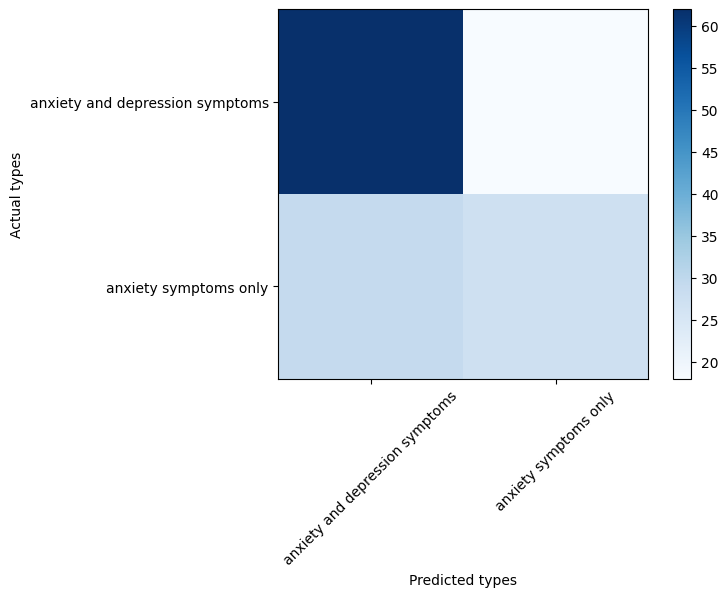

In [332]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
classes = ["anxiety and depression symptoms", "anxiety symptoms only"]

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)  ###
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted types")
plt.ylabel("Actual types")
plt.show()

In [333]:
df["comorbidity_type_summarized"].value_counts()

comorbidity_type_summarized
anxiety and depression present       80
anxiety present depression absent    56
Name: count, dtype: int64

now let us compute the recall and precision scores

In [334]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_encoded_2, y_pred, pos_label=0)
recall = recall_score(y_encoded_2, y_pred, pos_label=0)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6813186813186813
Recall: 0.775


* treating label 0 (anxiety and depression symptoms present) as the positive class, out of all individuals that the model predict they have both anxiety and depression symptoms, 0.68 (69%) are actually with both anxiety and depression symptoms(Precision).
* out of all the individuals with both anxiety and depression symptoms, the model predicted (0.77) 77% correctly. meaning the rest are false negatives (around 22%) 

In [335]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt

In [336]:
y_prob_positive_class0 = cross_val_predict(
    model_2, features_2, y_encoded_2, cv=cv, method="predict_proba"
)[:, 0]

In [337]:
fpr, tpr, thresholds = roc_curve(y_encoded_2, y_prob_positive_class0, pos_label=0)

In [338]:
roc_auc = auc(fpr, tpr)

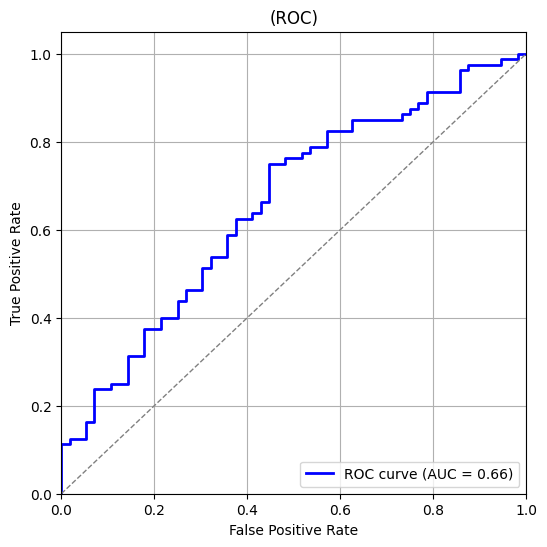

In [339]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("(ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()